In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


In [3]:
from torchvision.models import googlenet


In [5]:
batch_size = 128      # imágenes por batch
num_workers = 2       # procesos paralelos para cargar datos
data_dir = "/content/drive/MyDrive/ColabNotebooks/"   # carpeta donde CIFAR10 será guardado


In [6]:
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])


In [7]:
trainset = datasets.CIFAR10(
    root=data_dir, train=True, download=True, transform=transform_train
)

testset = datasets.CIFAR10(
    root=data_dir, train=False, download=True, transform=transform_test
)


100%|██████████| 170M/170M [00:05<00:00, 28.6MB/s]


In [8]:
trainloader = DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers
)

testloader = DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=num_workers
)


In [9]:
class_names = trainset.classes
print("Clases:", class_names)
print("Tamaño train:", len(trainset), "tamaño test:", len(testset))


Clases: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Tamaño train: 50000 tamaño test: 10000


In [11]:
# --- Función para desnormalizar ---
def denormalize(img_tensor, mean, std):
    mean = torch.tensor(mean).view(3,1,1)
    std  = torch.tensor(std).view(3,1,1)
    return img_tensor * std + mean


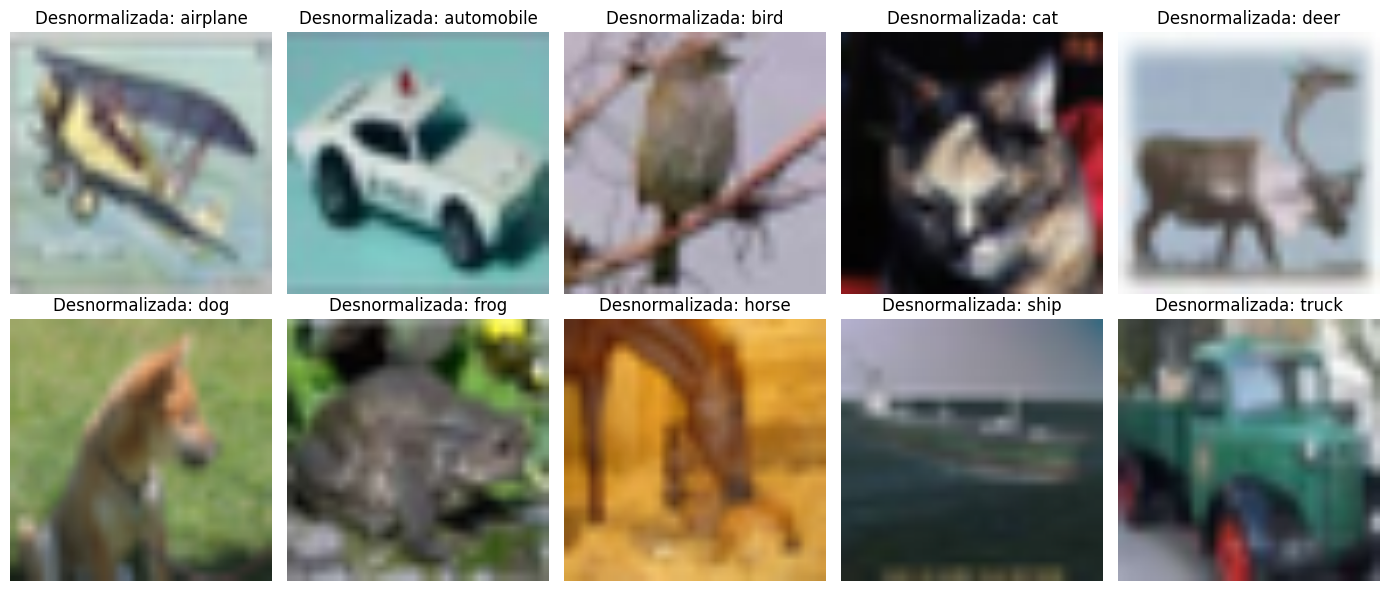

In [12]:
# --- Mostrar imágenes desnormalizadas ---
def show_denormalized_samples(dataset, class_names):
    fig, axes = plt.subplots(2, 5, figsize=(14, 6))
    axes = axes.flatten()

    mean = [0.485, 0.456, 0.406]
    std  = [0.229, 0.224, 0.225]

    for i, cls in enumerate(class_names):
        idx = np.random.choice(np.where(np.array(dataset.targets) == i)[0])
        img, _ = dataset[idx]  # normalizada

        img_denorm = denormalize(img, mean, std)
        img_np = img_denorm.permute(1, 2, 0).cpu().numpy()
        img_np = np.clip(img_np, 0, 1)

        axes[i].imshow(img_np)
        axes[i].set_title(f"Desnormalizada: {cls}")
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

show_denormalized_samples(trainset, class_names)


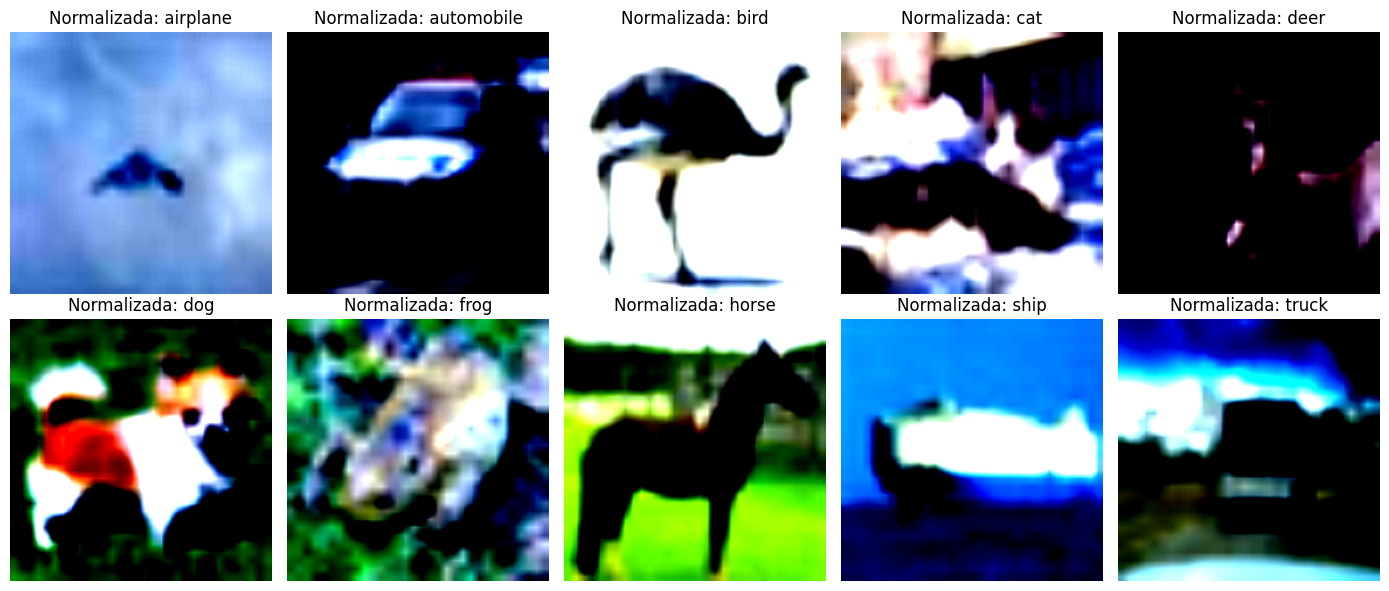

In [14]:
#  Mostrar imágenes normalizadas


def show_normalized_samples(dataset, class_names):
    fig, axes = plt.subplots(2, 5, figsize=(14, 6))
    axes = axes.flatten()

    for i, cls in enumerate(class_names):
        idx = np.random.choice(np.where(np.array(dataset.targets) == i)[0])
        img, _ = dataset[idx]  # img está normalizada (tensor)

        img_np = img.permute(1, 2, 0).cpu().numpy()

        axes[i].imshow(img_np)
        axes[i].set_title(f"Normalizada: {cls}")
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

show_normalized_samples(trainset, class_names)


In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Entrenando en:", device)

NUM_EPOCHS = 10   #  Ajusta las épocas


Entrenando en: cuda


In [16]:
model = googlenet(pretrained=False, aux_logits=True)  # GoogLeNet puro, sin pesos
model.fc = torch.nn.Linear(1024, 10)                  # 10 clases de CIFAR-10

model.to(device)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [17]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)


In [18]:
def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs, aux1, aux2 = model(images)

        loss1 = criterion(outputs, labels)
        loss2 = criterion(aux1, labels)
        loss3 = criterion(aux2, labels)
        loss = loss1 + 0.3 * (loss2 + loss3)

        loss.backward()
        optimizer.step()

        total_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)

    return total_loss / total, correct / total


In [19]:
def evaluate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)

            loss = criterion(outputs, labels)

            total_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

    return total_loss / total, correct / total


In [20]:
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []


for epoch in range(NUM_EPOCHS):
    train_loss, train_acc = train_one_epoch(model, trainloader, optimizer, criterion, device)
    test_loss,  test_acc  = evaluate(model, testloader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"Época {epoch+1}/{NUM_EPOCHS}")
    print(f"  Entrenamiento -> Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
    print(f"  Validación    -> Loss: {test_loss:.4f},  Acc: {test_acc:.4f}")


Época 1/10
  Entrenamiento -> Loss: 2.1050, Acc: 0.5408
  Validación    -> Loss: 1.1997,  Acc: 0.5821
Época 2/10
  Entrenamiento -> Loss: 1.3138, Acc: 0.7153
  Validación    -> Loss: 0.7810,  Acc: 0.7296
Época 3/10
  Entrenamiento -> Loss: 1.0216, Acc: 0.7865
  Validación    -> Loss: 0.7129,  Acc: 0.7612
Época 4/10
  Entrenamiento -> Loss: 0.8564, Acc: 0.8236
  Validación    -> Loss: 0.6626,  Acc: 0.7670
Época 5/10
  Entrenamiento -> Loss: 0.7434, Acc: 0.8493
  Validación    -> Loss: 0.5423,  Acc: 0.8093
Época 6/10
  Entrenamiento -> Loss: 0.6544, Acc: 0.8686
  Validación    -> Loss: 0.5393,  Acc: 0.8139
Época 7/10
  Entrenamiento -> Loss: 0.5872, Acc: 0.8847
  Validación    -> Loss: 0.4659,  Acc: 0.8421
Época 8/10
  Entrenamiento -> Loss: 0.5281, Acc: 0.8966
  Validación    -> Loss: 0.5047,  Acc: 0.8365
Época 9/10
  Entrenamiento -> Loss: 0.4711, Acc: 0.9094
  Validación    -> Loss: 0.4315,  Acc: 0.8547
Época 10/10
  Entrenamiento -> Loss: 0.4225, Acc: 0.9212
  Validación    -> Loss: 

In [21]:
save_path = "/content/drive/MyDrive/ColabNotebooks/googlenet_cifar10.pth"
torch.save(model.state_dict(), save_path)
print("Modelo guardado en:", save_path)

Modelo guardado en: /content/drive/MyDrive/ColabNotebooks/googlenet_cifar10.pth


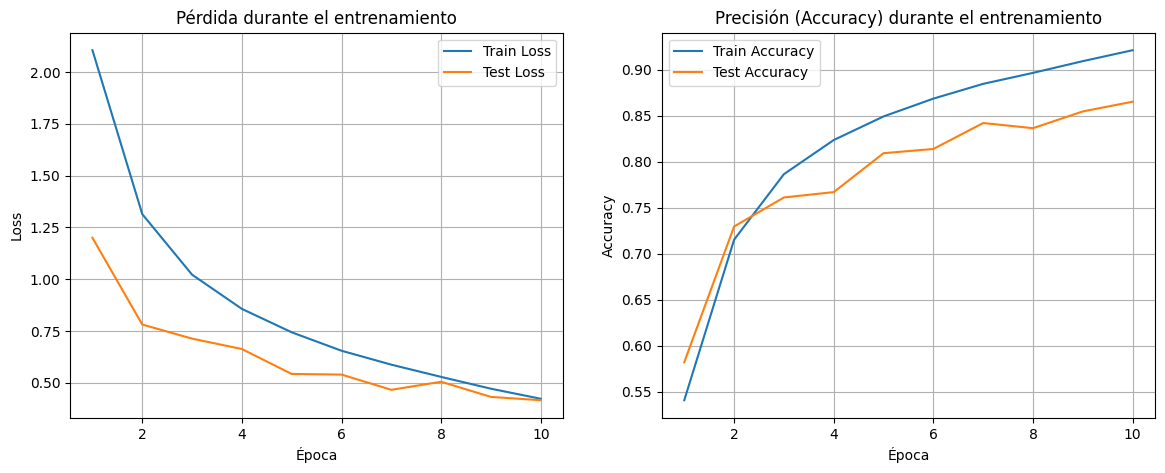

In [22]:
epochs = range(1, NUM_EPOCHS+1)

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, test_losses,  label="Test Loss")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Pérdida durante el entrenamiento")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(epochs, train_accuracies, label="Train Accuracy")
plt.plot(epochs, test_accuracies,  label="Test Accuracy")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.title("Precisión (Accuracy) durante el entrenamiento")
plt.legend()
plt.grid(True)

plt.show()


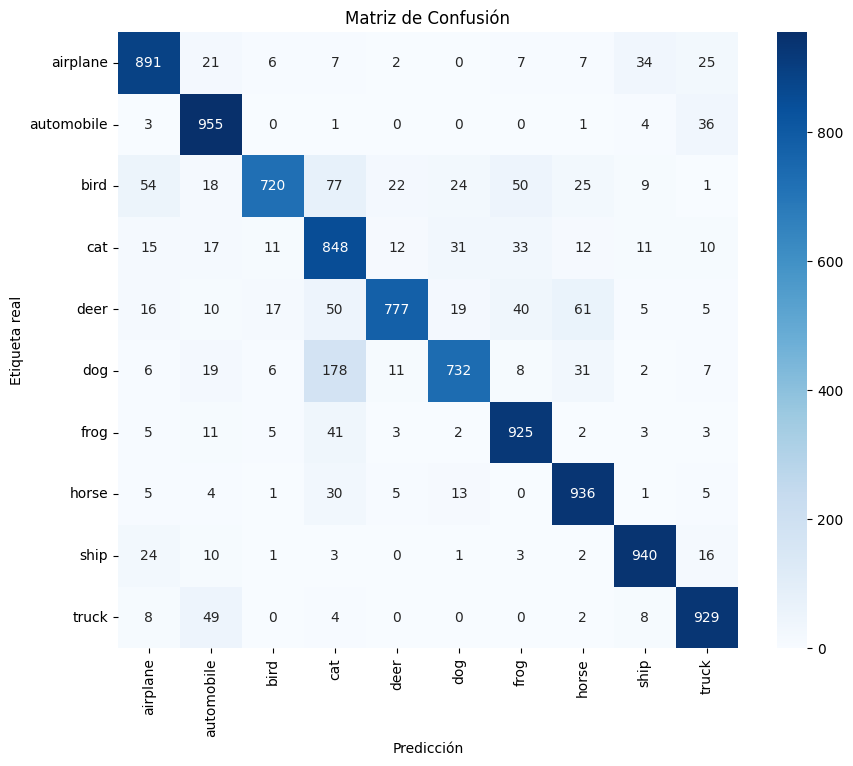

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def get_all_predictions(model, dataloader, device):
    model.eval()
    preds = []
    targets = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)

            preds.extend(predicted.cpu().numpy())
            targets.extend(labels.numpy())

    return np.array(preds), np.array(targets)

preds, targets = get_all_predictions(model, testloader, device)

cm = confusion_matrix(targets, preds)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión")
plt.show()


In [24]:
from sklearn.metrics import classification_report

print(classification_report(targets, preds, target_names=class_names))


              precision    recall  f1-score   support

    airplane       0.87      0.89      0.88      1000
  automobile       0.86      0.95      0.90      1000
        bird       0.94      0.72      0.81      1000
         cat       0.68      0.85      0.76      1000
        deer       0.93      0.78      0.85      1000
         dog       0.89      0.73      0.80      1000
        frog       0.87      0.93      0.90      1000
       horse       0.87      0.94      0.90      1000
        ship       0.92      0.94      0.93      1000
       truck       0.90      0.93      0.91      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.86     10000
weighted avg       0.87      0.87      0.86     10000

